<a href="https://colab.research.google.com/github/roshan1960701/DataMining/blob/main/CA2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import missingno as msno

### Reading Json file using Panda library

In [ ]:
Data = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Data Mining/News_Category_Dataset_v3.json', lines=True)
Data.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

### Convering Json file into CSV format for future use

In [ ]:
DataFrame = pd.DataFrame(Data)
DataFrame

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [ ]:
DataFrame.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv',index=None)

## Creating new Dataset based on 5 categories

In [ ]:
updatedData = DataFrame[DataFrame.category.isin(["POLITICS", "WELLNESS","ENTERTAINMENT","TRAVEL","STYLE & BEAUTY"])]
updatedData

link  \
20      https://www.huffpost.com/entry/golden-globes-r...   
21      https://www.huffpost.com/entry/biden-us-forces...   
24      https://www.huffpost.com/entry/ukraine-festiva...   
28      https://www.huffpost.com/entry/james-cameron-f...   
30      https://www.huffpost.com/entry/europe-britain-...   
...                                                   ...   
209478  https://www.huffingtonpost.com/entry/post_us_5...   
209479  https://www.huffingtonpost.com/entry/life-tips...   
209480  https://www.huffingtonpost.com/entry/cheryl-ti...   
209512  https://www.huffingtonpost.com/entry/sundance-...   
209513  https://www.huffingtonpost.com/entry/girl-with...   

                                                 headline        category  \
20      Golden Globes Returning To NBC In January Afte...   ENTERTAINMENT   
21      Biden Says U.S. Forces Would Defend Taiwan If ...        POLITICS   
24      ‘Beautiful And Sad At The Same Time’: Ukrainia...        POLITICS   
28      James Cameron Says He 'Clashed' With Studio Be...   ENTERTAINMENT   
30      Biden Says Queen's Death Left 'Giant Hole' For...        POLITICS   
...                                                   ...             ...   
209478        Tea Time Beneath The Western Ghats (PHOTOS)          TRAVEL   
209479  This Is Only the Beginning: Surprising Advice ...        WELLNESS   
209480               Cheryl Tiegs In A Sauna: A Look Back  STYLE & BEAUTY   
209512  Sundance, Ice-T, and Shades of the American Ra...   ENTERTAINMENT   
209513  'Girl With the Dragon Tattoo' India Release Ca...   ENTERTAINMENT   

                                        short_description  \
20      For the past 18 months, Hollywood has effectiv...   
21      President issues vow as tensions with China rise.   
24      An annual celebration took on a different feel...   
28      The "Avatar" director said aspects of his 2009...   
30      U.S. President Joe Biden, in London for the fu...   
...                                                   ...   
209478  As we stepped out of the serene plantation, we...   
209479  My great-aunt Ida loves to say, "This is only ...   
209480  "A Look Back" is a daily column that highlight...   
209512  Representation of the collective diaspora has ...   
209513  "Sony Pictures will not be releasing The Girl ...   

                                                  authors       date  
20                                                        2022-09-20  
21                                                        2022-09-19  
24                                     Jonathan Nicholson 2022-09-19  
28                                           Ben Blanchet 2022-09-18  
30                                 Darlene Superville, AP 2022-09-18  
...                                                   ...        ...  
209478  Stefani Jackenthal, Contributor\nAdventure Tra... 2012-01-28  
209479  Ellie Knaus, Contributor\nAtomic Moms Podcast ... 2012-01-28  
209480                                         Sarah Leon 2012-01-28  
209512  Courtney Garcia, Contributor\nI tell stories a... 2012-01-28  
209513                                                    2012-01-28  

[90623 rows x 6 columns]

In [ ]:
sum(updatedData.duplicated())

7

In [ ]:
updatedData = updatedData.drop_duplicates()

In [ ]:
updatedData.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [ ]:

Counter(updatedData['category'])


# print(updatedData.iloc[:4])

Counter({'ENTERTAINMENT': 17362,
         'POLITICS': 35601,
         'WELLNESS': 17942,
         'STYLE & BEAUTY': 9811,
         'TRAVEL': 9900})

As per the pie chart we came to know that the weitage of each category

 * we have simply taken the percentage of each category from 10,000 records to make new datatse

1) politics - 39.3 --> 39.3% 10,000 = 3930

2) welness - 19.8 —-> 19.8% 10,000 = 1980

3) entertainment - 19.2 -—> 19.2% 10,000 = 1920

4) travel 10.9 —-> 10.9% 10,000 = 1090

5) style and beuty -10.8 —-> 10.8% 10,000 = 1080









In [ ]:
# print(len(updatedData['category']))
# for i in len(updatedData.category):
#   print(i)

recordsLen = [3930,1980,1920,1090,1080]
top5Categories = ["POLITICS", "WELLNESS","ENTERTAINMENT","TRAVEL","STYLE & BEAUTY"]
newdataFrame = pd.DataFrame()

def fetchRecords():
  for index in range(len(recordsLen)):
     records = updatedData[updatedData['category'].str.contains(top5Categories[index])]
     abc = updatedData.iloc[:recordsLen[index]]
  return abc
xyz = fetchRecords()
xyz
# DataFrame[DataFrame.category.isin(str(top5Categories[0]))]

# print(DataFrame[DataFrame['category'].str.contains(top5Categories[0])])
# updatedData.category['POLITICS'].iloc[:4]

# print(df[df['Courses'].str.contains('ark')])
# print(updatedData['category'].value_counts)
# print(updatedData.iloc[:4])



link  \
20    https://www.huffpost.com/entry/golden-globes-r...   
21    https://www.huffpost.com/entry/biden-us-forces...   
24    https://www.huffpost.com/entry/ukraine-festiva...   
28    https://www.huffpost.com/entry/james-cameron-f...   
30    https://www.huffpost.com/entry/europe-britain-...   
...                                                 ...   
2080  https://www.huffpost.com/entry/scotus-allows-t...   
2081  https://www.huffpost.com/entry/trump-funding-n...   
2082  https://www.huffpost.com/entry/paul-stanley-co...   
2084  https://www.huffpost.com/entry/dwayne-the-rock...   
2085  https://www.huffpost.com/entry/trump-rants-med...   

                                               headline       category  \
20    Golden Globes Returning To NBC In January Afte...  ENTERTAINMENT   
21    Biden Says U.S. Forces Would Defend Taiwan If ...       POLITICS   
24    ‘Beautiful And Sad At The Same Time’: Ukrainia...       POLITICS   
28    James Cameron Says He 'Clashed' With Studio Be...  ENTERTAINMENT   
30    Biden Says Queen's Death Left 'Giant Hole' For...       POLITICS   
...                                                 ...            ...   
2080  Supreme Court Allows Extreme Texas Abortion Ba...       POLITICS   
2081  Trump Funding Network Paid $4.3 Million To Peo...       POLITICS   
2082  Kiss Rocker Paul Stanley Describes 'Mild' Coro...  ENTERTAINMENT   
2084  Dwayne 'The Rock' Johnson Is Shook At How Much...  ENTERTAINMENT   
2085  Trump Rants About Media Spending 'All Night' O...       POLITICS   

                                      short_description  \
20    For the past 18 months, Hollywood has effectiv...   
21    President issues vow as tensions with China rise.   
24    An annual celebration took on a different feel...   
28    The "Avatar" director said aspects of his 2009...   
30    U.S. President Joe Biden, in London for the fu...   
...                                                 ...   
2080  S.B. 8 offers private citizens a $10,000 bount...   
2081  OpenSecrets tracked payments through federal r...   
2082  The rock icon also shared an image of himself ...   
2084  Lieutenant Eric Fields, an Alabama police offi...   
2085  "The level of stupidity — and we had a great d...   

                     authors       date  
20                           2022-09-20  
21                           2022-09-19  
24        Jonathan Nicholson 2022-09-19  
28              Ben Blanchet 2022-09-18  
30    Darlene Superville, AP 2022-09-18  
...                      ...        ...  
2080         Alanna Vagianos 2021-09-01  
2081          Mary Papenfuss 2021-08-31  
2082                Ed Mazza 2021-08-31  
2084          Jenna Amatulli 2021-08-31  
2085          Mary Papenfuss 2021-08-31  

[1080 rows x 6 columns]

In [ ]:
newdataFrame

Empty DataFrame
Columns: []
Index: []

### Reading CSV file

In [ ]:
newsDataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")
newsDataset

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors        date  
0       Carla K. Johnson, AP  2022-09-23  
1             Mary Papenfuss  2022-09-23  
2              Elyse Wanshel  2022-09-23  
3           Caroline Bologna  2022-09-23  
4             Nina Golgowski  2022-09-22  
...                      ...         ...  
209522      Reuters, Reuters  2012-01-28  
209523                   NaN  2012-01-28  
209524                   NaN  2012-01-28  
209525                   NaN  2012-01-28  
209526                   NaN  2012-01-28  

[209527 rows x 6 columns]

In [ ]:
newsDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209521 non-null  object
 2   category           209527 non-null  object
 3   short_description  189815 non-null  object
 4   authors            172109 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [ ]:
#get total count of categories
NewsCategory = newsDataset['category'].value_counts()
print(NewsCategory)
print(f'There are total {len(NewsCategory)} categories of news in this Dataset')

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

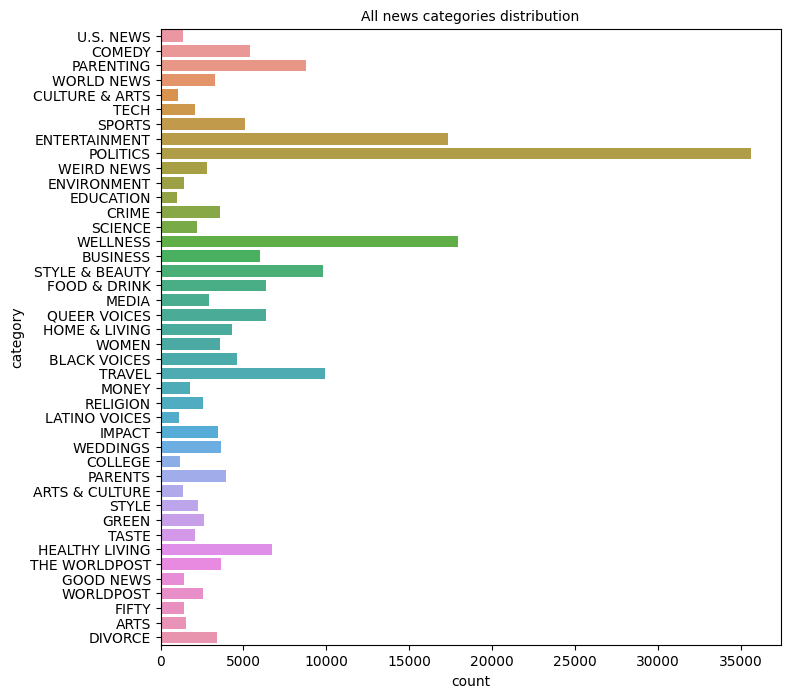

In [ ]:
#Plot horizontal category distribution
plt.figure(figsize = [8, 8])
sns.countplot(y=newsDataset["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 10)
plt.show()

['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS']


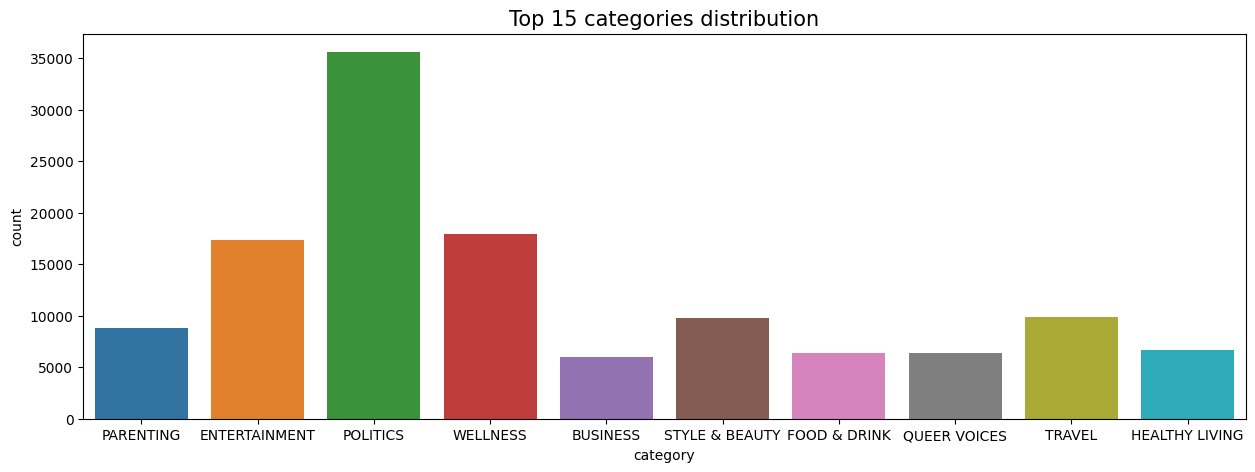

In [ ]:
# get only top 15 categories
topCategories = list(newsDataset["category"].value_counts().nlargest(10).keys())
print(topCategories)

dataset_top = newsDataset[newsDataset['category'].isin(topCategories)]
plt.figure(figsize = [15, 5])
sns.countplot(x=dataset_top["category"])
plt.title("Top 15 categories distribution", fontsize = 15)
plt.show()

In [ ]:
# Top categories by and number of news per categories
df_categories = pd.DataFrame(newsDataset['category'].value_counts()).reset_index()
df_categories.rename(columns={'index':'news_classes','category':'numcat'}, inplace=True)

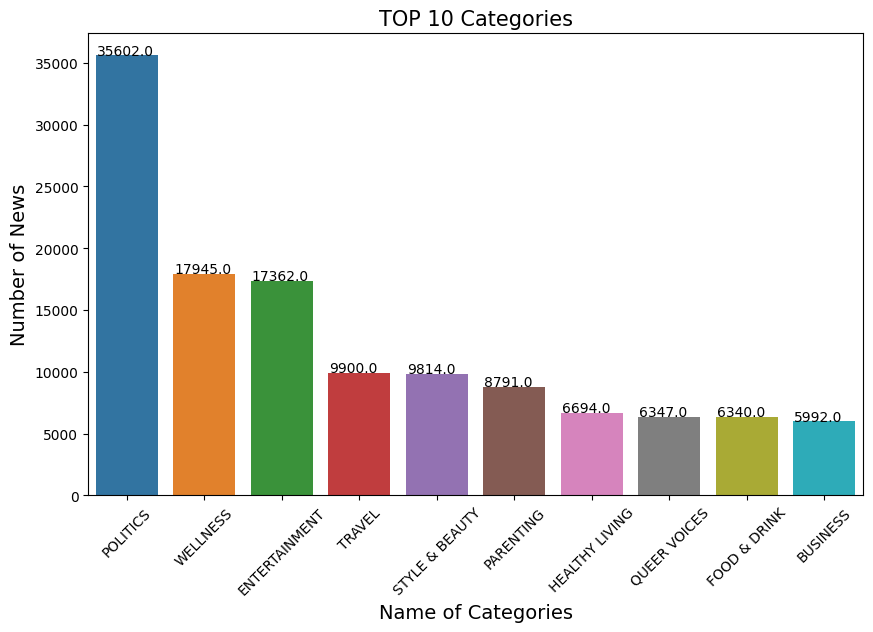

In [ ]:
# display top 10 categories
plt.figure(figsize=(10,6))

ax = sns.barplot(x=np.array(df_categories.news_classes)[:10],y= np.array(df_categories.numcat)[:10])

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height() + 50))
plt.title("TOP 10 Categories", size=15)
plt.xlabel("Name of Categories", size=14)
plt.xticks(rotation=45)
plt.ylabel("Number of News", size=14)
plt.show()

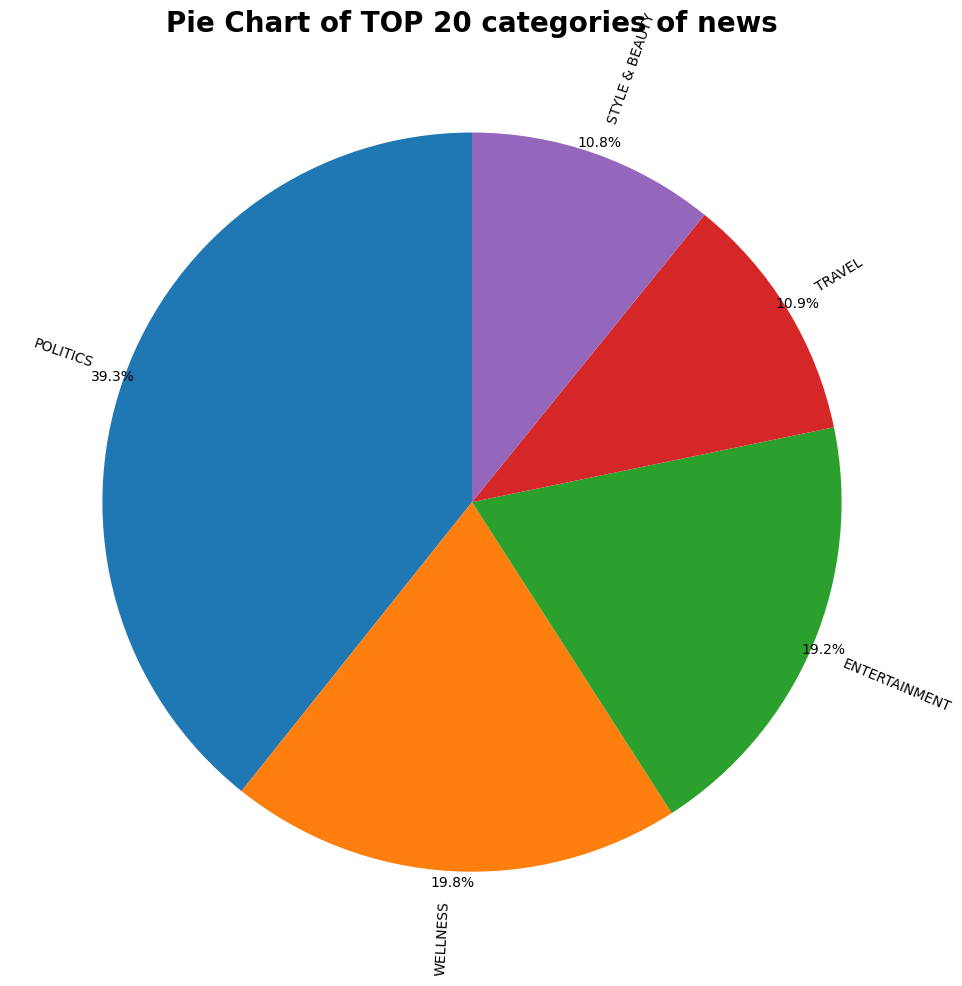

In [ ]:
# plot the pie chart of top 20 categories of news articles
fig = plt.figure(figsize=(12,12))
A = plt.pie(df_categories['numcat'][:5],
            labels=df_categories['news_classes'][:5],
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.08,
            pctdistance=1.03,
            rotatelabels=45
            )

plt.title("Pie Chart of TOP 20 categories of news", size=20, weight='bold')
plt.show()

### Data cleaning (Removing puncatuation and Differenct form of words)

In [ ]:
# Finding total duplicate values in dataset
sum(newsDataset.duplicated())

13

In [ ]:
# There are total 13 duplicate values in dataset
# removing duplicate values from dataset
newsDataset = newsDataset.drop_duplicates()

In [ ]:
print(sum(newsDataset.duplicated()))
newsDataset.shape

0


(209514, 6)

In [ ]:
# Finding Null values in Dataset
newsDataset.isna().sum()

link                     0
headline                 6
category                 0
short_description    19712
authors              37405
date                     0
dtype: int64

In [ ]:
newsDataset.isna().sum()

link                     0
headline                 6
category                 0
short_description    19712
authors              37405
date                     0
dtype: int64

<Axes: >

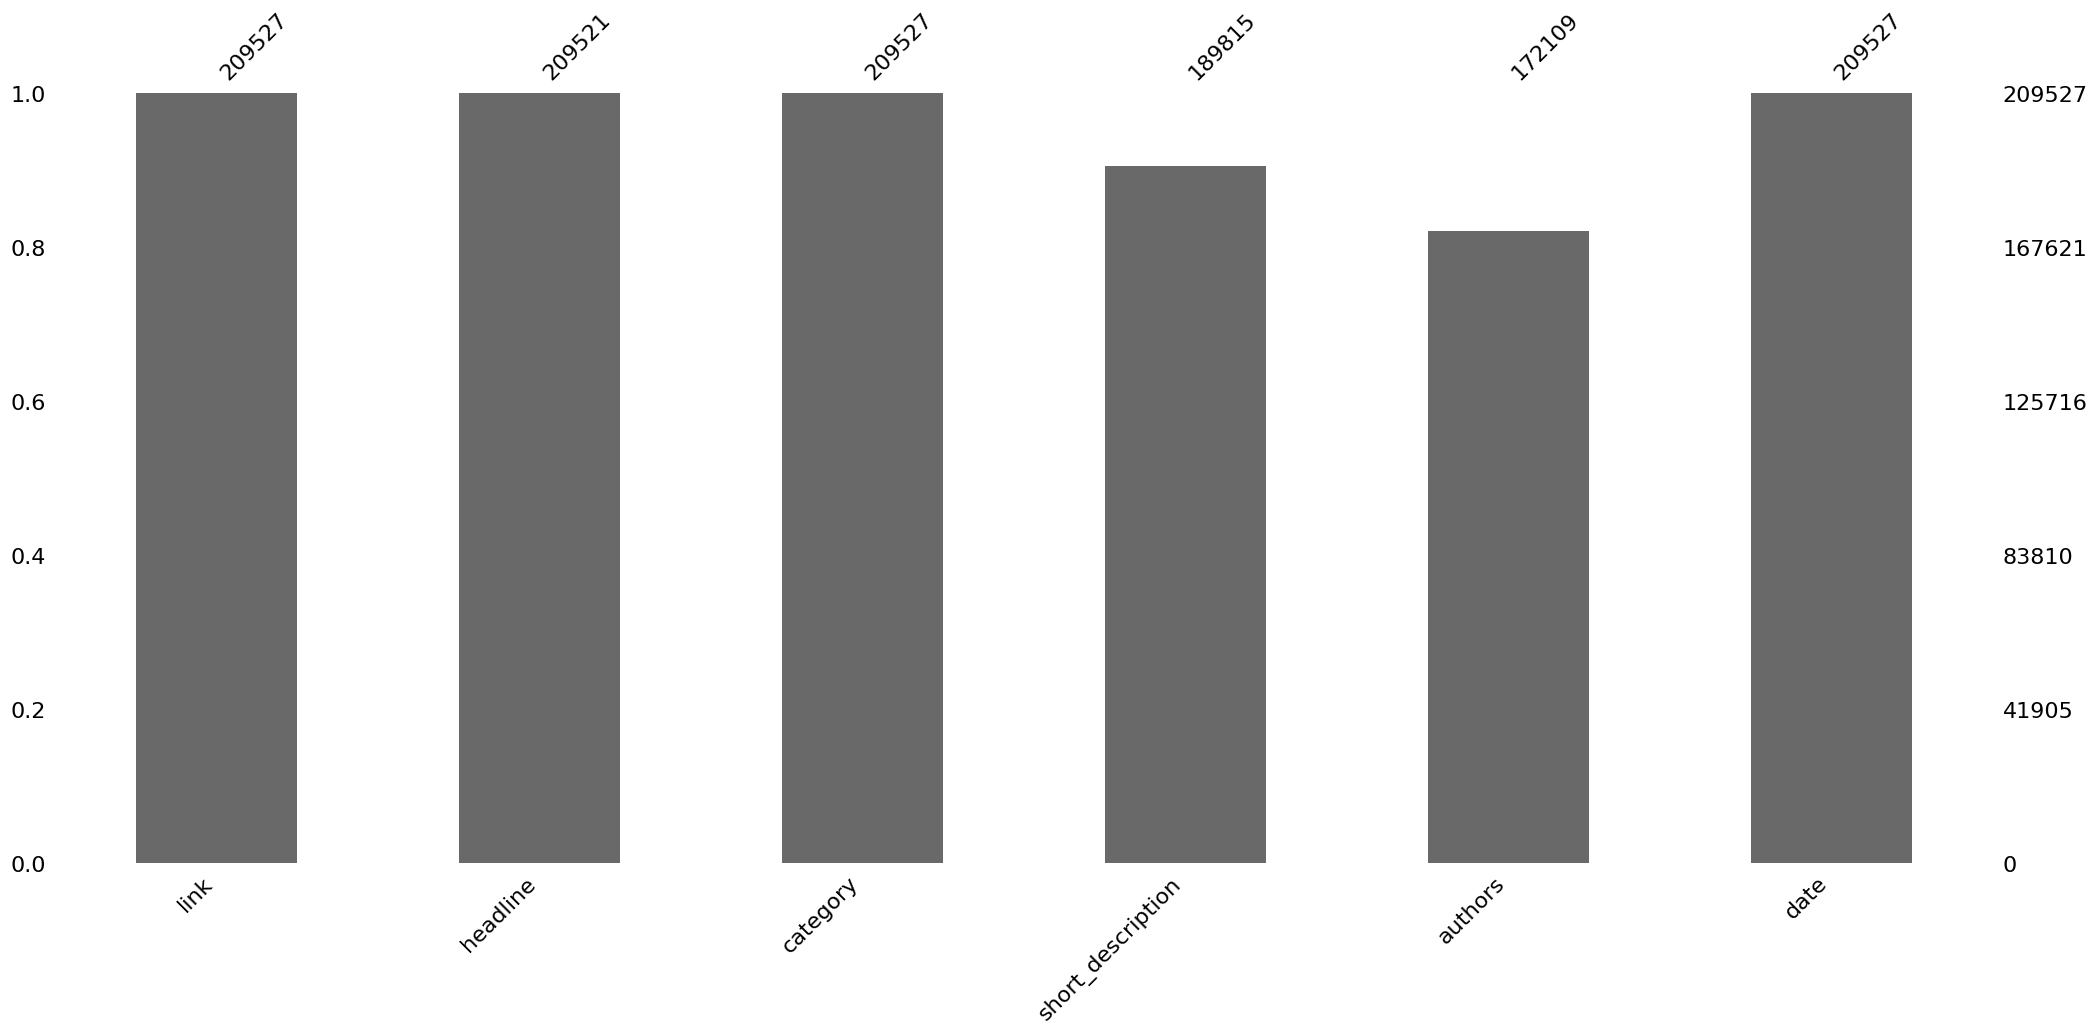

In [ ]:
##bar graph shows total values of each column in entire dataset
msno.bar(newsDataset)

<Axes: >

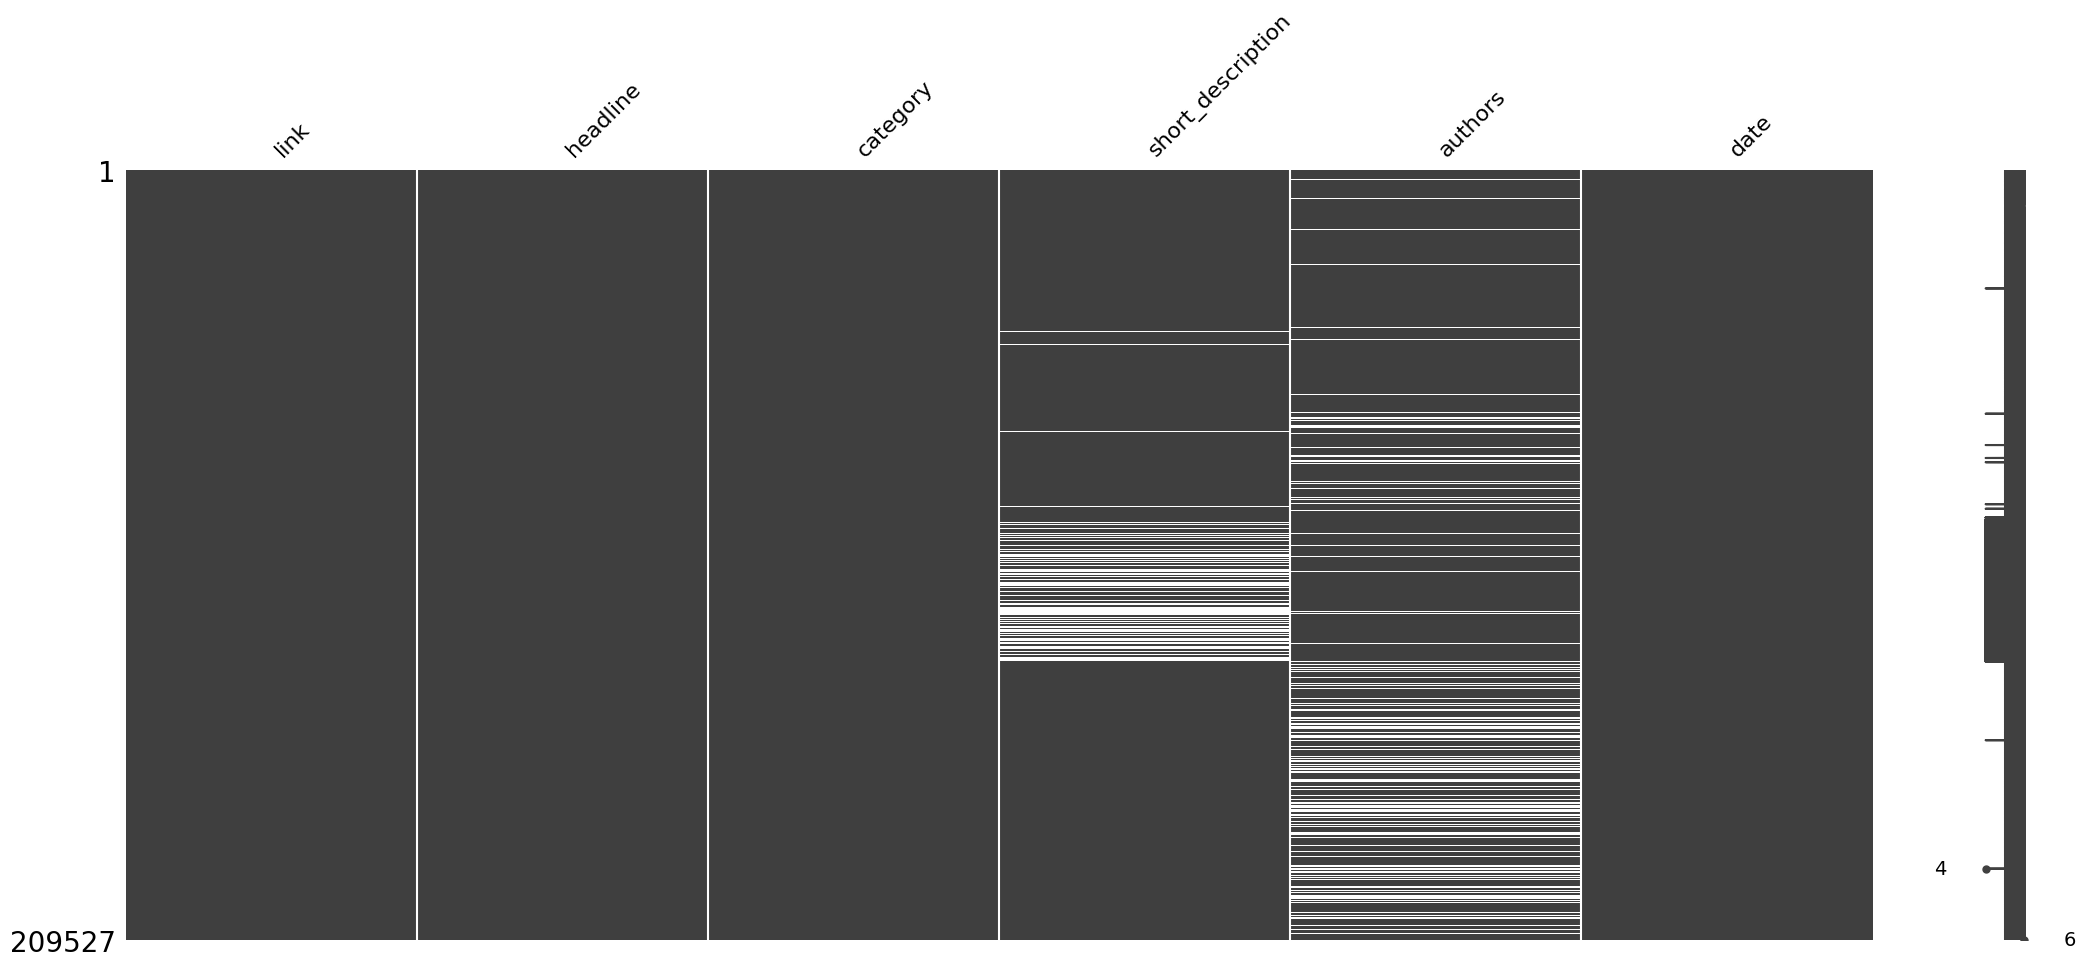

In [ ]:
### Matrxi shows the exactly null values are present in dataset
msno.matrix(newsDataset)

In [ ]:
### We can only fill missing values of authors column
### We must replace those values with most frequent used values
newsDataset['authors'].mode()


13

In [ ]:
### We have null values in headlines, shortDescrptio and authors.
### Its better to drop because headlines and short_description should be unique
newsDataset.dropna()

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209517  https://www.huffingtonpost.com/entry/games-for...   
209518  https://www.huffingtonpost.com/entry/google-pl...   
209519  https://www.huffingtonpost.com/entry/congress-...   
209521  https://www.huffingtonpost.com/entry/watch-top...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209517                      Good Games -- Is It possible?       TECH   
209518    Google+ Now Open for Teens With Some Safeguards       TECH   
209519                                           Web Wars       TECH   
209521         Watch The Top 9 YouTube Videos Of The Week       TECH   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209517  I don't think people who play Zynga games are ...   
209518  For the most part, teens' experience on Google...   
209519  These "Web Wars" threaten to rage on for some ...   
209521  If you're looking to see the most popular YouT...   
209522  Verizon Wireless and AT&T are already promotin...   

                                                  authors        date  
0                                    Carla K. Johnson, AP  2022-09-23  
1                                          Mary Papenfuss  2022-09-23  
2                                           Elyse Wanshel  2022-09-23  
3                                        Caroline Bologna  2022-09-23  
4                                          Nina Golgowski  2022-09-22  
...                                                   ...         ...  
209517               Mateo Gutierrez, Contributor\nArtist  2012-01-28  
209518    Larry Magid, Contributor\nTechnology journalist  2012-01-28  
209519  John Giacobbi, Contributor\nTales from the Int...  2012-01-28  
209521                                    Catharine Smith  2012-01-28  
209522                                   Reuters, Reuters  2012-01-28  

[156859 rows x 6 columns]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#nltk.download('all')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [ ]:
print(newsDataset.iloc[0])

link                 https://www.huffpost.com/entry/covid-boosters-...
headline             Over 4 Million Americans Roll Up Sleeves For O...
category                                                     U.S. NEWS
short_description    Health experts said it is too early to predict...
authors                                           Carla K. Johnson, AP
date                                                        2022-09-23
Name: 0, dtype: object


In [ ]:
# Clean and preprocess the data
df['text'] = df['headline'] + ' ' + df['short_description']
df = df[['text', 'category']]
df = df[df['text'].notna()]
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\d+', '')

<ipython-input-111-b86d20995bb8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
<ipython-input-111-b86d20995bb8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


In [ ]:
#Clean the text
df_cleanedtext['text'] = ''
df_cleanedtext['text'] = newsDataset["headline"] + " " + newsDataset["short_description"]
df_cleanedtext['text']= df_cleanedtext['text'].map(lambda x: clean_text(x))
X, y = df_cleanedtext['text'], newsDataset["category"]

AttributeError: ignored

### Text Classification Models for News Categories

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")

In [ ]:
# combine headline and short_description columns
df['text'] = df['headline'] + ' ' + df['short_description']

In [ ]:
# Replace NaN values with an empty string
df['text'] = df['text'].fillna('')

In [ ]:
df['text'][2]

'23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23) "Until you have a dog you don\'t understand what could be eaten."'

In [ ]:
def remove_punctuation_and_digits(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\d+', '', text)
    return text

df['text'] = df['text'].apply(remove_punctuation_and_digits)

In [ ]:
df['text'][2]

' Of The Funniest Tweets About Cats And Dogs This Week Sept  Until you have a dog you dont understand what could be eaten'

In [ ]:
# Convert text to lowercase
df['text'] = df['text'].str.lower()

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)


In [ ]:
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:

# Evaluate the model on the testing set
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00       293
ARTS & CULTURE       0.00      0.00      0.00       275
  BLACK VOICES       0.00      0.00      0.00       889
      BUSINESS       1.00      0.00      0.01      1216
       COLLEGE       0.00      0.00      0.00       202
        COMEDY       0.67      0.00      0.00      1022
         CRIME       1.00      0.00      0.01       713
CULTURE & ARTS       1.00      0.00      0.01       202
       DIVORCE       1.00      0.05      0.10       664
     EDUCATION       0.00      0.00      0.00       209
 ENTERTAINMENT       0.48      0.62      0.54      3419
   ENVIRONMENT       0.00      0.00      0.00       313
         FIFTY       0.00      0.00      0.00       263
  FOOD & DRINK       0.74      0.45      0.56      1270
     GOOD NEWS       0.00      0.00      0.00       270
         GREEN       0.00      0.00      0.00       532
HEALTHY LIVING       1.00      0.00      0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


You can experiment with different vectorizers, classification models, and hyperparameters to improve the performance of the model. Additionally, you can use techniques like cross-validation and grid search to tune the hyperparameters and avoid overfitting.

## Naive Bayes Model in different way

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")

In [ ]:
# Clean and preprocess the data
df['text'] = df['headline'] + ' ' + df['short_description']
df = df[['text', 'category']]
df = df[df['text'].notna()]
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\d+', '')

<ipython-input-17-b86d20995bb8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
<ipython-input-17-b86d20995bb8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the data
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train the model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Evaluate the model
y_pred = nb.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4132971577588705


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00       173
ARTS & CULTURE       0.00      0.00      0.00       259
  BLACK VOICES       0.00      0.00      0.00       862
      BUSINESS       0.83      0.01      0.02       947
       COLLEGE       0.00      0.00      0.00       178
        COMEDY       1.00      0.00      0.01       926
         CRIME       1.00      0.00      0.01       559
CULTURE & ARTS       1.00      0.00      0.01       236
       DIVORCE       0.98      0.06      0.11       713
     EDUCATION       0.00      0.00      0.00       186
 ENTERTAINMENT       0.51      0.72      0.60      3009
   ENVIRONMENT       0.00      0.00      0.00       290
         FIFTY       0.00      0.00      0.00       230
  FOOD & DRINK       0.71      0.47      0.57      1258
     GOOD NEWS       0.00      0.00      0.00       187
         GREEN       0.00      0.00      0.00       395
HEALTHY LIVING       1.00      0.00      0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MultinomialNB model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")

In [ ]:
# Clean and preprocess the data
df['text'] = df['headline'] + ' ' + df['short_description']
df = df[['text', 'category']]
df = df[df['text'].notna()]
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\d+', '')

<ipython-input-132-b86d20995bb8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
<ipython-input-132-b86d20995bb8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

In [ ]:
nb = MultinomialNB(alpha=1e-4, fit_prior=False)
nb.fit(X_trX_testain_t, y_train_label)
pred_mnb = nb.predict(X_test_t)

##Text classification using Naive Bayes algorithm on the News Category Dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Data Mining/News_Category_Dataset_v3.json', lines=True)

In [ ]:
# Remove unwanted columns
df = df.drop(['authors', 'date', 'link', 'headline'], axis=1)

In [ ]:
# Function to preprocess the text
def preprocess_text(text):
    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Split into words
    words = text.split()
    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in words if word not in stopwords]
    # Join the words back into a string
    text = ' '.join(words)
    return text

# Apply the preprocessing function to the 'text' column
df['category'] = df['category'].apply(preprocess_text)


LookupError: ignored

In [ ]:

# Apply the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

KeyError: ignored

## Sentimenal analysis on News Categories

In [ ]:
!pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")

In [ ]:
import nltk
import string
nltk.download('stopwords')
nltk.download('all')
from nltk.corpus import stopwords
nltk.download('punkt')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data.

In [ ]:

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return " ".join(tokens)

df['text'] = df['headline'] + " " + df['short_description']
df['text'] = df['text'].apply(preprocess)

TypeError: ignored

## Sentimenatl Analysis with other method

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")

In [ ]:
# Clean and preprocess the data
df['text'] = df['headline'] + ' ' + df['short_description']
df = df[['text', 'category']]
df = df[df['text'].notna()]
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('\d+', '')


<ipython-input-24-b86d20995bb8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
<ipython-input-24-b86d20995bb8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)


In [ ]:
# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
X_train_sentiments = []
X_test_sentiments = []

for text in X_train:
    sentiment = sia.polarity_scores(text)
    X_train_sentiments.append(sentiment['compound'])

for text in X_test:
    sentiment = sia.polarity_scores(text)
    X_test_sentiments.append(sentiment['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Evaluate the model
threshold = 0.5
y_pred = [1 if sentiment > threshold else 0 for sentiment in X_test_sentiments]
accuracy = sum(y_test == y_pred) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.0


In this code, we first load the News Category Dataset and preprocess the data by combining the "headline" and "short_description" columns, converting the text to lowercase, and removing punctuation and digits. We then split the preprocessed data into training and testing sets.

Next, we perform sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from the NLTK library. We compute the sentiment score for each text in the training and testing sets and use a threshold of 0.5 to classify the sentiment as positive (1) or negative (0).

Finally, we evaluate the model's accuracy by comparing the predicted sentiment labels with the true sentiment labels in the testing data

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

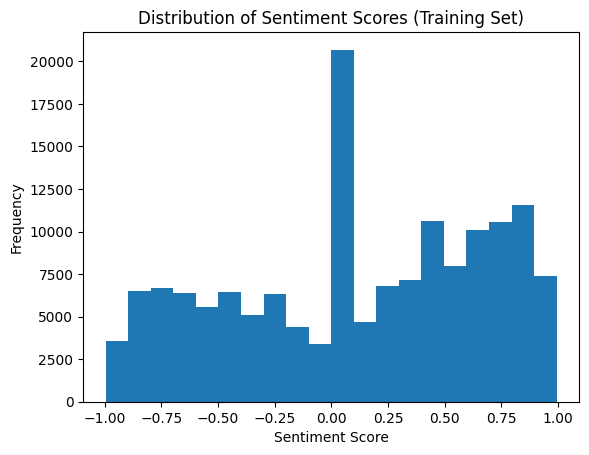

In [ ]:
# Create a histogram of sentiment scores for the training set
plt.hist(X_train_sentiments, bins=20)
plt.title('Distribution of Sentiment Scores (Training Set)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The first graph is a histogram of the sentiment scores for the training set, which shows the distribution of sentiment scores in the data

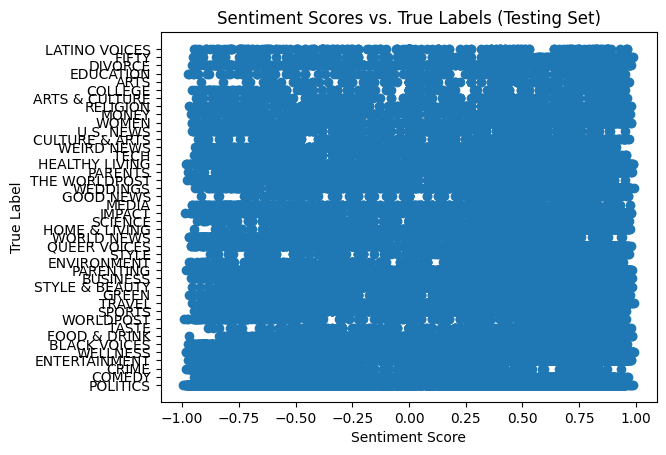

In [ ]:
# Create a scatter plot of sentiment scores vs. true labels for the testing set
plt.scatter(X_test_sentiments, y_test)
plt.title('Sentiment Scores vs. True Labels (Testing Set)')
plt.xlabel('Sentiment Score')
plt.ylabel('True Label')
plt.show()

The second graph is a scatter plot of the sentiment scores vs. the true labels for the testing set, which shows how well the sentiment analysis algorithm was able to predict the true sentiment labels

In [ ]:
# Create a confusion matrix of predicted vs. true labels for the testing set
confusion = confusion_matrix(y_test, y_pred)
plt.imshow(confusion, cmap='binary')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()
plt.show()

## Wordcloud for text classification

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Mining/NewsDataset.csv")
df

In [ ]:
df.dropna()

### word cloud for short_description

In [ ]:
# Convert short_description to string
df['short_description'] = df['short_description'].astype(str)

In [ ]:
# Concatenate the short_description column
text = ' '.join(df['short_description'].tolist())
print ("There are {} words in the combination of all review.".format(len(text)))


There are 24198462 words in the combination of all review.


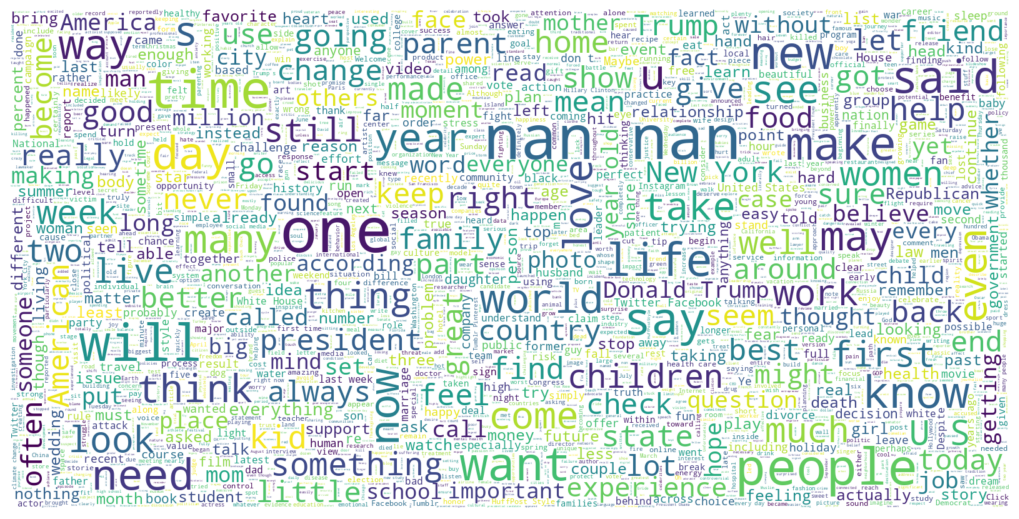

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=1600, height=800, background_color="white",max_font_size=100, max_words=10000).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### wordcloud for headlines

In [ ]:
# Convert short_description to string
df['headline'] = df['headline'].astype(str)

In [ ]:
# Concatenate the short_description column
text = ' '.join(df['headline'].tolist())
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12449138 words in the combination of all review.


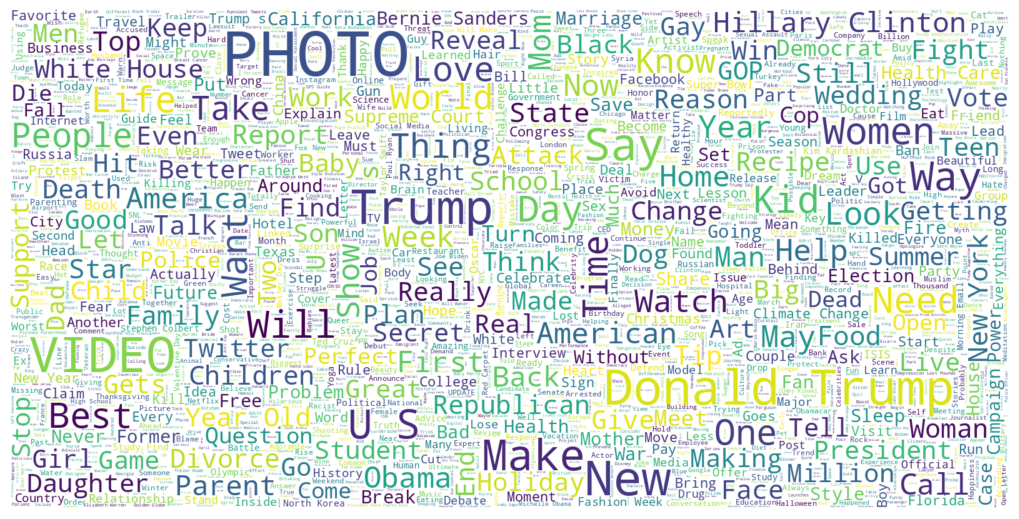

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=1600, height=800, background_color="white",max_font_size=100, max_words=10000).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### wordcloud for Authors

In [ ]:
Counter(df['authors'])

Counter({'Carla K. Johnson, AP': 1,
         'Mary Papenfuss': 1566,
         'Elyse Wanshel': 650,
         'Caroline Bologna': 889,
         'Nina Golgowski': 1052,
         nan: 37418,
         'DÁNICA COTO, AP': 2,
         'Marina Fang': 696,
         'Aamer Madhani, AP': 5,
         'GRAHAM DUNBAR, AP': 1,
         'Mari Yamaguchi, AP': 4,
         'Dánica Coto, AP': 3,
         'Ben Blanchet': 38,
         'Eric Tucker and Mary Clare Jalonick, AP': 1,
         'Marco Margaritoff': 22,
         'Marina Fang and Candice Frederick': 1,
         'Beth Harris, AP': 2,
         'Jon Gambrell, AP': 5,
         'Danica Coto, AP': 3,
         'Jonathan Nicholson': 8,
         'Eric Tucker and Rahim Faiez, AP': 1,
         'Pat Eaton-Robb, AP': 1,
         'Mike Corder, Jill Lawless and Danica Kirka, AP': 1,
         'Darlene Superville, AP': 4,
         'Drew Costley, AP': 1,
         'BECKY BOHRER, MARK THIESSEN and JOHN ANTCZAK, AP': 1,
         'ZARAR KHAN, AP': 1,
         'Nathalie 

In [ ]:
print(len(df['authors']))

209527


In [ ]:
df['authors'].dropna()

0         Carla K. Johnson, AP
1               Mary Papenfuss
2                Elyse Wanshel
3             Caroline Bologna
4               Nina Golgowski
                  ...         
209522        Reuters, Reuters
209523                     nan
209524                     nan
209525                     nan
209526                     nan
Name: authors, Length: 209527, dtype: object

In [ ]:
# Convert short_description to string
df['authors'] = df['authors'].astype(str)

In [ ]:
# Concatenate the short_description column
text = ' '.join(df['authors'].tolist())
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6914761 words in the combination of all review.


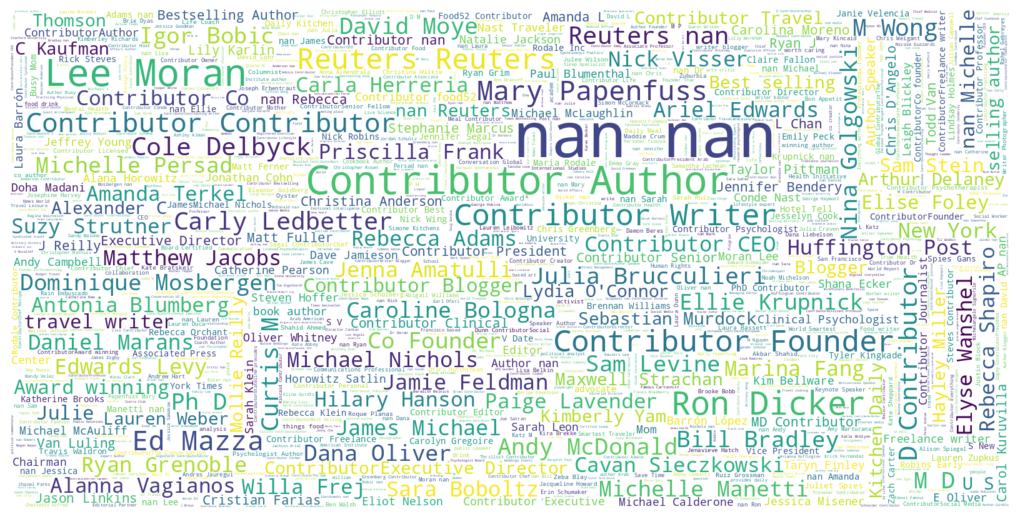

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=1600, height=800, background_color="white",max_font_size=100, max_words=6914761).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### wordcloud for category

In [ ]:
# Convert short_description to string
df['category'] = df['category'].astype(str)

In [ ]:
# Concatenate the short_description column
text = ' '.join(df['category'].tolist())
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2098845 words in the combination of all review.


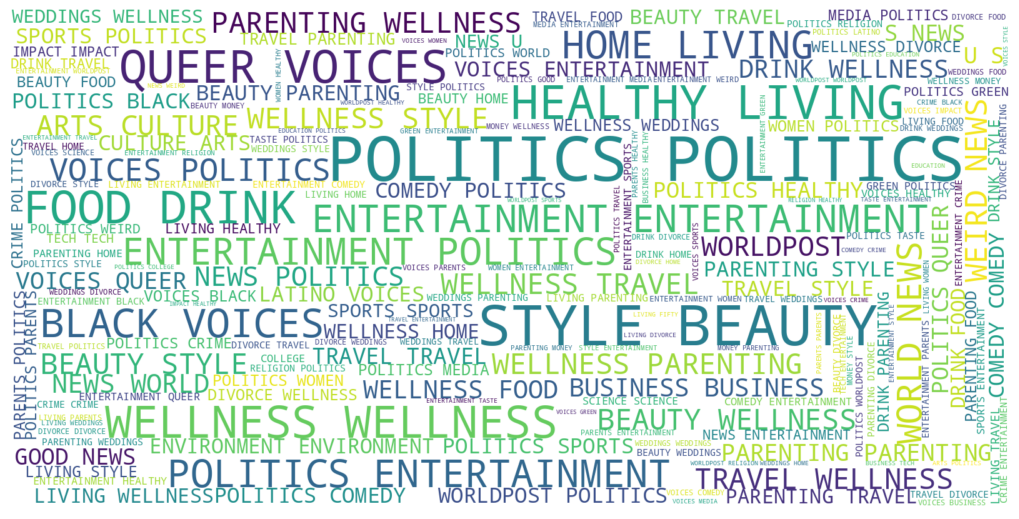

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,width=1600, height=800, background_color="white",max_font_size=100, max_words=200).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Wordcloud for 41 categories

(-0.5, 1599.5, 599.5, -0.5)

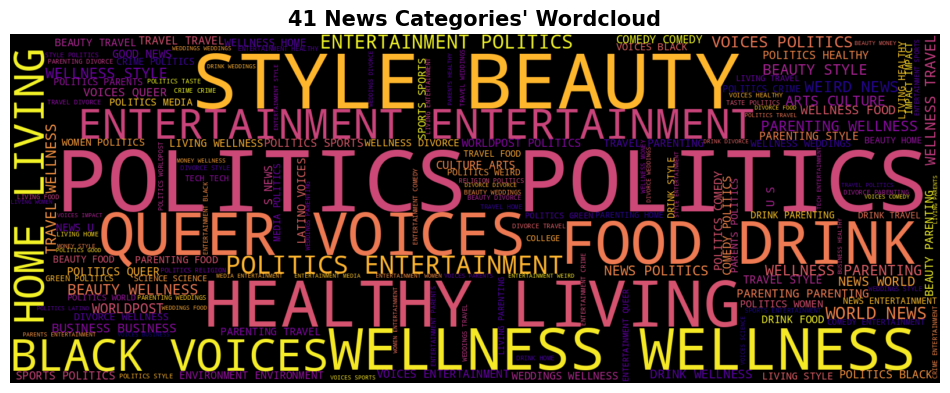

In [ ]:
# wordcloud of categories of news articles in our dataset
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000,
               min_font_size=10,
               height=600,
               width=1600,
               background_color='black',
               contour_color='black',
               colormap='plasma',
               repeat=False,
               stopwords=STOPWORDS).generate(' '.join(df['category']))

plt.title("41 News Categories' Wordcloud", size=15, weight='bold')
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

### Questions


1) Why only Political category is most popular in news artilces why not any others.

2)what is the behaviour of political category in the article

3)Clustering vs Umap VS classificatins

4)Recomendation
add rating in dataset simply add rating in each record simply provide randomly rating no to each column


==============================================

**New Questions**

1) We can do text analysis to predict category based on short description

2) Any categorical regression to predict the category
based on features without short descriptions

3) compare results

4) Which approach is better to predict article's category

5) DO we have sub cluster's within any category based on the short description -- Umap is better option for this

6)



